In [13]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
df_cc = pd.read_csv("/Users/spandanapatil/Desktop/FactorAnalysis/CC GENERAL.csv")
df_cc.shape
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df_cc.drop([ 'CUST_ID'], axis=1, inplace=True)
df_cc.dropna(inplace=True)

In [11]:
kmo_all,kmo_model=calculate_kmo(df_cc)
kmo_model

0.640893239542142

In [14]:
fa = FactorAnalyzer()
fa.fit(df_cc)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([4.62930009e+00, 3.46363229e+00, 1.51611673e+00, 1.28751346e+00,
       1.06702509e+00, 9.71173642e-01, 8.35751939e-01, 7.15824825e-01,
       6.25888438e-01, 5.23856343e-01, 4.01846616e-01, 3.01671735e-01,
       2.42540745e-01, 2.00372153e-01, 1.71376520e-01, 4.60976542e-02,
       1.17307815e-05])

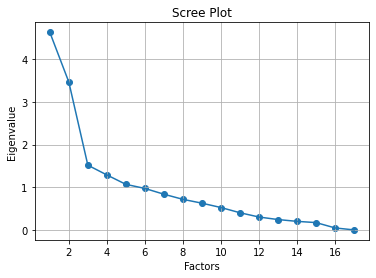

In [16]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_cc.shape[1]+1),eigen_values)
plt.plot(range(1,df_cc.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
fa = FactorAnalyzer()
fa.set_params(n_factors = 8, rotation = "varimax")
fa.fit(df_cc)
loadings = fa.loadings_
df_fa_cc = pd.DataFrame({'Column1': fa.loadings_[:, 0], 'Column2': fa.loadings_[:, 1], 'Column3': fa.loadings_[:, 2], 'Column4': fa.loadings_[:, 3], 'Column5': fa.loadings_[:, 4], 'Column6': fa.loadings_[:, 5]})

In [21]:
df_fa_cc.head()

,Column1,Column2,Column3,Column4,Column5,Column6
0,0.100259,0.307874,-0.049528,-0.018417,0.671457,0.668025
1,0.044944,0.116019,0.217280,0.169214,0.433166,-0.012080
2,0.876549,-0.063767,0.189453,0.153719,0.028192,0.138182
3,0.970126,-0.052446,0.066519,0.192769,0.017886,0.112147
4,0.298459,-0.054899,0.333487,0.007065,0.034743,0.121893


[7.538672506635527, 4.944687008899625, 3.832782531753181, 2.7484373269926485, 2.192021230969959, 1.6378500476299385, 1.2322321812627375, 0.819739046739156, 0.5385230788810909]
[386445462723.71497, 274951819531.60455, 229259590498.12207, 203036711656.9306, 178080618715.16086, 159517814576.63293, 142105317409.80963, 130086760745.17232, 121693438870.62811]


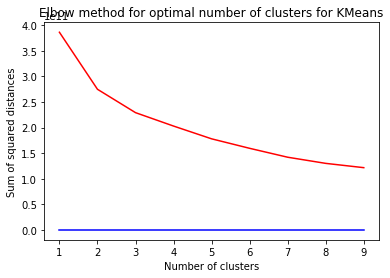

In [32]:
from sklearn.cluster import KMeans
fa_list = []
cc_list = []


K = range(1, 10)

for k in range(1, 10):
    
    
    kmeans = KMeans(n_clusters=k,  init = 'k-means++', random_state = 48)
    kmeans.fit(df_cc)
    cc_list.append(kmeans.inertia_)
    
for k in range(1, 10):
    
    
    kmeans_fa = KMeans(n_clusters=k,  init = 'k-means++', random_state = 48)
    kmeans_fa.fit(df_fa_cc)
    fa_list.append(kmeans_fa.inertia_)



plt.plot(K,cc_list, c='red') 
plt.plot(K,fa_list, c='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal number of clusters for KMeans')
plt.show()

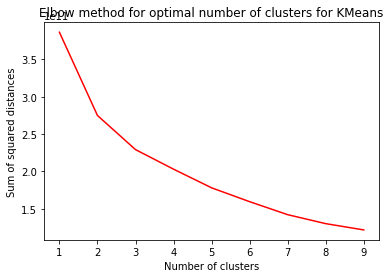

In [33]:
plt.plot(K,cc_list, c='red') 
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal number of clusters for KMeans')
plt.show()

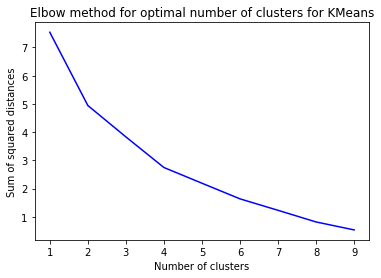

In [34]:
plt.plot(K,fa_list, c='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal number of clusters for KMeans')
plt.show()

In [48]:
from sklearn.preprocessing import OneHotEncoder

df_house = pd.read_csv("/Users/spandanapatil/Desktop/FactorAnalysis/Data/HousePrices.csv")

# Separate the features and target
df_house = df_house.drop('SalePrice', axis=1)

# Encoding text data
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)
df_house = ohe.fit_transform(df_house).toarray()

df_house = pd.DataFrame(df_house)

In [49]:
df_house.head()

,0,1,2,3,4,5,6,7,8,9,...,9098,9099,9100,9101,9102,9103,9104,9105,9106,9107
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
kmo_all,kmo_model=calculate_kmo(df_house)
kmo_model

nan

In [36]:
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()
df_digits = pd.DataFrame(digits.data)

In [44]:
df_digits.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_digits.dropna(inplace=True)

In [46]:
df_digits.isnull().values.any()

False

In [47]:
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [45]:
kmo_all,kmo_model=calculate_kmo(df_digits)
kmo_model

/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:199: RuntimeWarning: divide by zero encountered in true_divide
  Is = np.sqrt(1 / np.diag(m))
/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:199: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))
/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:200: RuntimeWarning: invalid value encountered in multiply
  retval = Is * m * np.repeat(Is, numrows).reshape(numrows, numrows)


nan